## Curva de calibración para la solucion B

### Importar las librerias necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Importar los datos del DataFrame


In [2]:
df = pd.read_csv('../Other_files/curvaCalibracionB.csv')
df


,CONCENTRACION,ABSORBANCIA
0,0,0.025
1,20,0.037
2,50,0.040
3,100,0.068
4,200,0.075
5,500,0.073


### Declarar los valores que tomaran cada eje


In [3]:
concentration = df['CONCENTRACION'].values.reshape(-1, 1)
absorbance = df[' ABSORBANCIA'].values.reshape(-1, 1)
concentration
absorbance


array([[0.025],
       [0.037],
       [0.04 ],
       [0.068],
       [0.075],
       [0.073]])

### Crear la gráfica para los valores reales


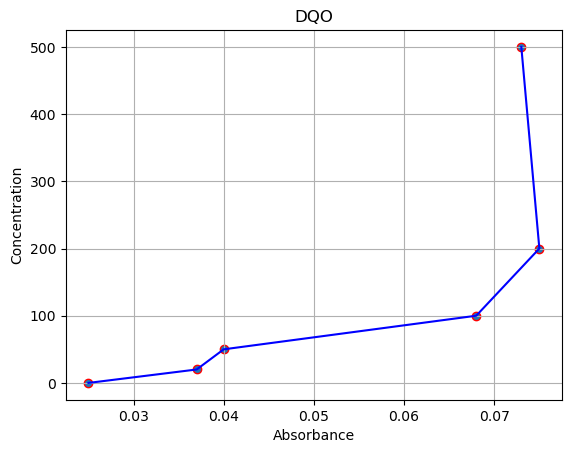

In [7]:
fig = plt.figure()
ax = fig.subplots()
plt.scatter(absorbance, concentration, edgecolors='red')
plt.plot(absorbance, concentration, color='blue')
ax.set_xlabel('Absorbance')
ax.set_ylabel('Concentration')
ax.set_title('DQO')
plt.grid()
plt.show()


### Obtener los valores de la ecuación de la recta mediante la librería **Scikit Learn**


In [4]:
linearRegressor = LinearRegression()
linearRegressor.fit(absorbance, concentration)
concentration_predict = linearRegressor.predict(absorbance)
concentration_predict


array([[-35.34512511],
       [ 41.9456428 ],
       [ 61.26833477],
       [241.61345988],
       [286.69974116],
       [273.81794651]])

### Calcular los valores de la pendiente y el intercepto


In [5]:
m = linearRegressor.coef_[0][0]
c = linearRegressor.intercept_[0]
label = r'$DQO= %0.4fx %+0.4f$' % (m, c)
print(label)


$DQO= 6440.8973x -196.3676$


### Calcular la R²

In [6]:
from sklearn.metrics import r2_score
R2 = r2_score(concentration, concentration_predict)
print(R2)

0.5440599551142098


### Agregar los datos calculados a la grafica anterior


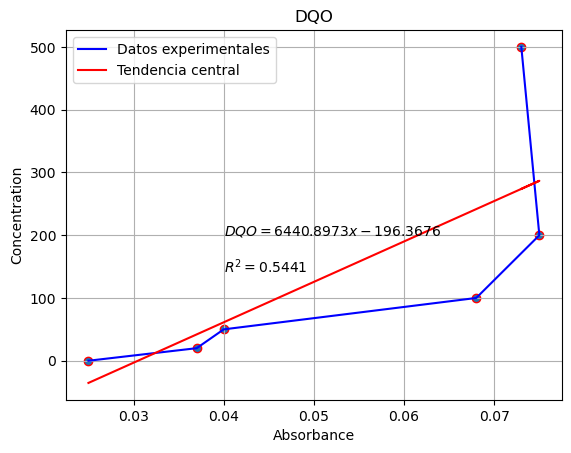

In [8]:
fig = plt.figure()
ax = fig.subplots()
plt.scatter(absorbance, concentration, edgecolors='red')
plt.plot(absorbance, concentration, color='blue', label='Datos experimentales')
plt.plot(absorbance, concentration_predict, color='red', label='Tendencia central')
ax.text(0.04, 140, r'$R^2= %0.4f$' %(R2))
ax.text(0.04, 200, label)
ax.set_xlabel('Absorbance')
ax.set_ylabel('Concentration')
ax.set_title('DQO')
plt.legend()
plt.grid()
plt.show()